<a href="https://colab.research.google.com/github/WuraolaOyewusi/Opinion-Mining-using-the-UCI-Drug-Review-Dataset/blob/master/Opinion_Mining_using_the_UCI_Drug_Review_Data_(Part_2)_Sentiment_Prediction_Using_Machine_Learning_Classification_Algorithms(Scikit_Learn_Implementatition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('drug review processed.csv.gz')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 9 columns):
Id                      215063 non-null int64
review                  215063 non-null object
cleanReview             215063 non-null object
rating                  215063 non-null float64
ratingSentiment         215063 non-null int64
ratingSentimentLabel    215063 non-null object
vaderReviewScore        215063 non-null float64
vaderSentiment          215063 non-null int64
vaderSentimentLabel     215063 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 14.8+ MB


In [75]:
df.head()

,Id,review,cleanReview,rating,ratingSentiment,ratingSentimentLabel,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,163740,"""I&#039;ve tried a few antidepressants over th...","""I&#039;ve tried antidepressants years (citalo...",10.0,2,positive,0.7623,2,positive
1,206473,"""My son has Crohn&#039;s disease and has done ...","""My son Crohn&#039;s disease done well Asacol....",8.0,2,positive,0.4767,2,positive
2,159672,"""Quick reduction of symptoms""","""Quick reduction symptoms""",9.0,2,positive,0.0000,0,neutral
3,39293,"""Contrave combines drugs that were used for al...","""Contrave combines drugs used alcohol, smoking...",9.0,2,positive,0.8115,2,positive
4,97768,"""I have been on this birth control for one cyc...","""I birth control one cycle. After reading revi...",9.0,2,positive,0.9619,2,positive


In [0]:
df = df.drop(columns=df.columns[0])

In [77]:
df.head()

,review,cleanReview,rating,ratingSentiment,ratingSentimentLabel,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,"""I&#039;ve tried a few antidepressants over th...","""I&#039;ve tried antidepressants years (citalo...",10.0,2,positive,0.7623,2,positive
1,"""My son has Crohn&#039;s disease and has done ...","""My son Crohn&#039;s disease done well Asacol....",8.0,2,positive,0.4767,2,positive
2,"""Quick reduction of symptoms""","""Quick reduction symptoms""",9.0,2,positive,0.0000,0,neutral
3,"""Contrave combines drugs that were used for al...","""Contrave combines drugs used alcohol, smoking...",9.0,2,positive,0.8115,2,positive
4,"""I have been on this birth control for one cyc...","""I birth control one cycle. After reading revi...",9.0,2,positive,0.9619,2,positive


In [78]:
df.groupby('vaderSentimentLabel').size()

vaderSentimentLabel
negative    102389
neutral      10808
positive    101866
dtype: int64

In [0]:
import matplotlib.pyplot as plt

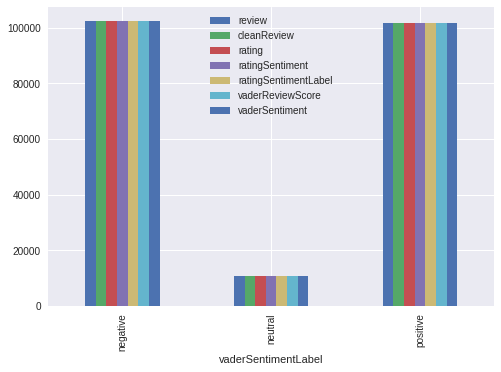

In [80]:

df.groupby('vaderSentimentLabel').count().plot.bar()
plt.show()

In [81]:
df.groupby('ratingSentimentLabel').size()

ratingSentimentLabel
negative     46901
neutral      25856
positive    142306
dtype: int64

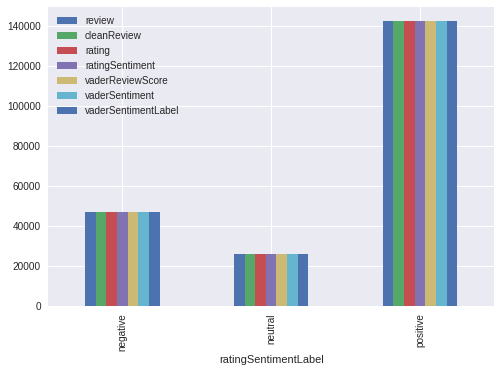

In [82]:
df.groupby('ratingSentimentLabel').count().plot.bar()
plt.show()

In [83]:
df.groupby('ratingSentiment').size()

ratingSentiment
0     25856
1     46901
2    142306
dtype: int64

In [0]:
positive_vader_sentiments = df[df.ratingSentiment == 2]
positive_string = []
for s in positive_vader_sentiments.cleanReview:
  positive_string.append(s)
positive_string = pd.Series(positive_string).str.cat(sep=' ')



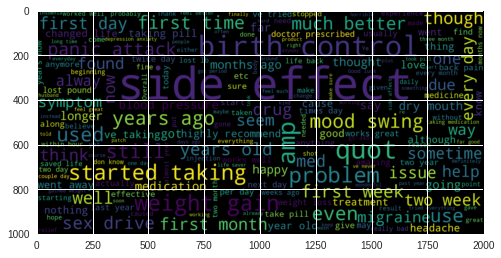

In [85]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(positive_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

In [86]:
for s in positive_vader_sentiments.cleanReview[:20]:
  if 'side effect' in s:
    print(s)

"I&#039;ve tried antidepressants years (citalopram, fluoxetine, amitriptyline), none helped depression, insomnia &amp; anxiety. My doctor suggested changed onto 45mg mirtazapine medicine saved life. Thankfully I side effects especially common - weight gain, I&#039;ve actually lost alot weight. I still suicidal thoughts mirtazapine saved me."
"My son Crohn&#039;s disease done well Asacol. He complaints shows side effects. He taken many nine tablets per day one time. I&#039;ve happy results, reducing bouts diarrhea drastically."
"I birth control one cycle. After reading reviews type similar birth controls I bit apprehensive start. Im giving birth control 9 10 I long enough 10. So far I love birth control! My side effects minimal like Im even birth control! I experienced mild headaches nausea ive feeling great! I got period cue third day inactive pills I idea coming I zero pms! My period light I barely cramping! I unprotected sex first month obviously didn&#039;t get pregnant I&#039;m ple

In [0]:
negative_vader_sentiments = df[df.ratingSentiment == 1]
negative_string = []
for s in negative_vader_sentiments.cleanReview:
  negative_string.append(s)
negative_string = pd.Series(negative_string).str.cat(sep=' ')

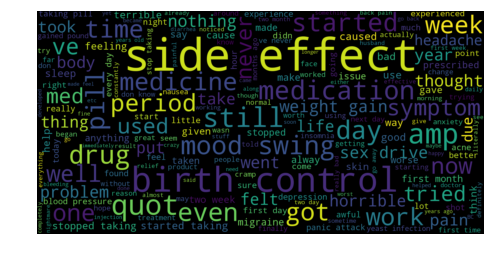

In [91]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(negative_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [92]:
for s in negative_vader_sentiments.cleanReview[:20]:
  if 'side effect' in s:
    print(s)

"About two months ago I switch LoLestrin Fe microgestin due insurance pharmacy. Since starting microgestin I&#039;ve noticed insane bloating nausea weird discharge. While lolestrin, periods consisted spotting average side effects, nothing serious, one month micro I got period heavy cramping painful I leave class. I&#039;ve also noticed I&#039;ve developed bad depression mood swings intense. My anxiety bad sex drive low nonexistent anymore. It helped acne I&#039;m lot paranoid getting pregnant I lolestrin. I&#039;m going talking doctor possibly getting shot."
"I 12 year survivor mirapex/Pramepexole. It miracle begin with. I slept 4hrs night enormous energy never tired. That lasted nine years. But time I lost bladder control, impulse disorders, loss concentration, myalgia neuropathy, falling asleep driving, many augmentation. I .5 mg. Detoxing med free med horrendous! After detox side effects cleared up. But I still issues memory concentration. This med I took reg bases health good. Im s

In [0]:
neutral_vader_sentiments = df[df.ratingSentiment == 0]
neutral_string = []
for s in neutral_vader_sentiments.cleanReview:
  neutral_string.append(s)
neutral_string = pd.Series(neutral_string).str.cat(sep=' ')

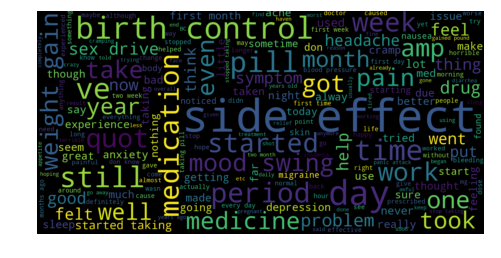

In [94]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(neutral_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [95]:
for s in neutral_vader_sentiments.cleanReview[:20]:
  if 'side effect' in s:
    print(s)

"Have Actos almost year, gained 24 pounds swelling hands feet retaining lot water thighs. My sugar levels good. My doctor lowered dosage 30 mg 15 mg refused take off. Will get second opinion side effects much."
"I&#039;d never birth control months ago, I given Ortho Tri-Cyclen Lo starter, I want much hormones. I went two whole packs decided switch extremely low sex drive, extreme mood swings increased appetite (I would eat full meal two hours later stomach would growling again). My relationship began suffer due side effects I stopped taking back normal. However, pill DID pros: I didn&#039;t get pregnant, regulated period caused breakouts acne. But wary weight gain, decreased libido mood swings."


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
features = tfidf.fit_transform(df.cleanReview)
labels   = df.vaderSentiment

In [98]:
features.shape

(215063, 1619394)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [0]:
x_train,x_test,y_train,y_test = train_test_split(df['cleanReview'],df['ratingSentimentLabel'],random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [0]:
models = [RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0),LinearSVC(),MultinomialNB(),LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000,multi_class='auto')]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model,features,labels,scoring='accuracy',cv=CV)
  for fold_idx,accuracy in enumerate(accuracies):
    entries.append((model_name,fold_idx,accuracy))
cv_df = pd.DataFrame(entries,columns=['model_name','fold_idx','accuracy'])

In [110]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.634026
1,RandomForestClassifier,1,0.655035
2,RandomForestClassifier,2,0.643596
3,RandomForestClassifier,3,0.637427
4,RandomForestClassifier,4,0.649671
5,LinearSVC,0,0.932464
6,LinearSVC,1,0.933532
7,LinearSVC,2,0.935089
8,LinearSVC,3,0.937622
9,LinearSVC,4,0.935761


In [111]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.934894
LogisticRegression        0.890144
MultinomialNB             0.820913
RandomForestClassifier    0.643951
Name: accuracy, dtype: float64

In [0]:
from sklearn.preprocessing import Normalizer

In [0]:
model = LinearSVC('l2')
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.25,random_state=0)
normalize = Normalizer()
x_train = normalize.fit_transform(x_train)
x_test = normalize.transform(x_test)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [115]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9289327827995387


In [116]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 1680,   420,   577],
       [   24, 24201,  1311],
       [   75,  1414, 24064]])

In [0]:
from mlxtend.plotting import plot_confusion_matrix

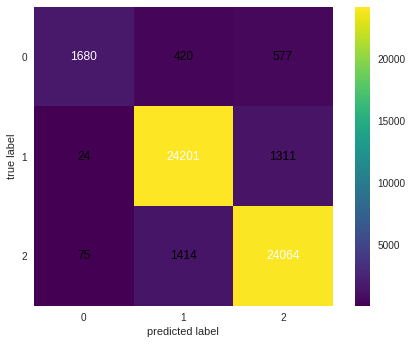

In [118]:
fig,ax = plot_confusion_matrix(conf_mat=conf_mat,colorbar=True,show_absolute=True,cmap='viridis')

In [119]:
from  sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names= df['ratingSentimentLabel'].unique()))

              precision    recall  f1-score   support

    positive       0.94      0.63      0.75      2677
     neutral       0.93      0.95      0.94     25536
    negative       0.93      0.94      0.93     25553

   micro avg       0.93      0.93      0.93     53766
   macro avg       0.93      0.84      0.88     53766
weighted avg       0.93      0.93      0.93     53766



In [0]:
#Precision is ratio between all adequately identified errors and all identified errors
#Positive precision means whenever positive was predicted, the model was right 94% of time
#Neutral precision means whenever neutral was predicted, the model was right 93% of time
#Negative precision means whenever negative was predicted the model was right 93%  of time
# With a weighted average of 93%  This model is quite good at recognizing error

In [0]:
#Recall or sensitivity or True Positive Rate is a ratio of all identified errors and all existing errors
#Positive recall means positive was selected 63% of the times it should have been selected
#Neutral recall means neutral was selected 95% of the times it should have been selected
#Negative recall means negative was selected 94% of the times it should have been selected
# with weighted average of 93%. this model is quite good at classifying error,it seem to be weaker in classifying positive class with recall percentage of 63%